Libraries:

In [6]:
import pandas as pd 
import matplotlib as plt
import numpy as numpy
import seaborn as sns


Loading the dataset and viewing a few columns:

In [7]:
df = pd.read_csv("visitors_to_kenya.csv")
df.head()

,Arrival_or_Departure,Date_End_of_Quater,Year_Text,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,OBJECTID
0,Arrivals,03/31/2005 12:00:00 AM,2005,264600,Visitors on Holiday,Q1,Actual,0
1,Arrivals,06/30/1991 12:00:00 AM,1991,149400,Visitors on Holiday,Q2,Actual,1
2,Arrivals,09/30/1991 12:00:00 AM,1991,215900,Visitors on Holiday,Q3,Actual,2
3,Arrivals,12/31/1991 12:00:00 AM,1991,158400,Visitors on Holiday,Q4,Actual,3
4,Arrivals,03/31/1992 12:00:00 AM,1992,155400,Visitors on Holiday,Q1,Actual,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Arrival_or_Departure     832 non-null    object
 1   Date_End_of_Quater       832 non-null    object
 2   Year_Text                832 non-null    object
 3   No_of_Visitors_to_Kenya  832 non-null    int64 
 4   Visitors_by_Purpose      832 non-null    object
 5   Period_Quater            832 non-null    object
 6   Results_Status           832 non-null    object
 7   OBJECTID                 832 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 52.1+ KB


Viewing what entries there are for each dpecific year

In [9]:
df[df['Year_Text'] == "2014*"]

,Arrival_or_Departure,Date_End_of_Quater,Year_Text,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,OBJECTID
104,Arrivals,03/31/2014 12:00:00 AM,2014*,266200,Visitors on Holiday,Q1,Preliminary,104
105,Arrivals,06/30/2014 12:00:00 AM,2014*,207000,Visitors on Holiday,Q2,Preliminary,105
106,Arrivals,09/30/2014 12:00:00 AM,2014*,267900,Visitors on Holiday,Q3,Preliminary,106
107,Arrivals,12/31/2014 12:00:00 AM,2014*,235700,Visitors on Holiday,Q4,Preliminary,107
121,Departures,03/31/2014 12:00:00 AM,2014*,234600,Visitors on Holiday,Q1,Preliminary,121
123,Departures,06/30/2014 12:00:00 AM,2014*,205600,Visitors on Holiday,Q2,Preliminary,123
125,Departures,09/30/2014 12:00:00 AM,2014*,244900,Visitors on Holiday,Q3,Preliminary,125
127,Departures,12/31/2014 12:00:00 AM,2014*,260300,Visitors on Holiday,Q4,Preliminary,127
312,Arrivals,03/31/2014 12:00:00 AM,2014*,50100,Visitors on Business,Q1,Preliminary,312
313,Arrivals,06/30/2014 12:00:00 AM,2014*,38500,Visitors on Business,Q2,Preliminary,313


# CLEANING:


 Removing string characters from the Year_Text column so as to be able to change its data type to integer

In [10]:
years = df['Year_Text'].apply(lambda x:pd.Series([i for i in (x.lower().split("*"))]))
years.columns = ['yr', 'x']


In [11]:
years = years['yr'].apply(lambda x:pd.Series([i for i in (x.lower().split("'"))]))
years[:5]

,0,1
0,2005,NaN
1,1991,NaN
2,1991,NaN
3,1991,NaN
4,1992,NaN


In [12]:
conc = pd.concat([df, years], axis =1, ignore_index = 'False')
conc[:3]

,0,1,2,3,4,5,6,7,8,9
0,Arrivals,03/31/2005 12:00:00 AM,2005,264600,Visitors on Holiday,Q1,Actual,0,2005,NaN
1,Arrivals,06/30/1991 12:00:00 AM,1991,149400,Visitors on Holiday,Q2,Actual,1,1991,NaN
2,Arrivals,09/30/1991 12:00:00 AM,1991,215900,Visitors on Holiday,Q3,Actual,2,1991,NaN


renaming the columns and picking the important:

In [13]:
conc.columns = ['move', 'date', 'Year_Text', 'num', 'purpose', 'Q', 'status', 'id', 'year', 'x']


In [14]:
conc = conc[['move', 'year', 'num', 'purpose', 'Q', 'status']]


Converting the year column to numeric and confirming the convertion:

In [15]:
conc['year'] = pd.to_numeric(conc['year'])

In [16]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   move     832 non-null    object
 1   year     832 non-null    int64 
 2   num      832 non-null    int64 
 3   purpose  832 non-null    object
 4   Q        832 non-null    object
 5   status   832 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.1+ KB


The year column was succesfully converted to integer.


Finding and changing some values in the purpose column

In [17]:
conc.loc[conc['purpose'] == 'Visitors on Holiday', 'purpose'] = 'holiday'
conc.loc[conc['purpose'] == 'Visitors on Business', 'purpose'] = 'business'
conc.loc[conc['purpose'] == 'Visitors in Transit', 'purpose'] = 'transit'


Confirming the changes

In [18]:
conc.head()

,move,year,num,purpose,Q,status
0,Arrivals,2005,264600,holiday,Q1,Actual
1,Arrivals,1991,149400,holiday,Q2,Actual
2,Arrivals,1991,215900,holiday,Q3,Actual
3,Arrivals,1991,158400,holiday,Q4,Actual
4,Arrivals,1992,155400,holiday,Q1,Actual


In [19]:
conc.tail()

,move,year,num,purpose,Q,status
827,Departures,2013,32600,Other,Q4,Actual
828,Departures,1991,1100,Other,Q4,Actual
829,Departures,1992,1300,Other,Q4,Actual
830,Departures,1993,2400,Other,Q4,Actual
831,Departures,1994,2600,Other,Q4,Actual


In [20]:
conc[conc['purpose'] == "business"]

,move,year,num,purpose,Q,status
208,Arrivals,2005,516000,business,Q1,Actual
209,Arrivals,1991,16600,business,Q2,Actual
210,Arrivals,1991,23100,business,Q3,Actual
211,Arrivals,1991,20000,business,Q4,Actual
212,Arrivals,1992,39100,business,Q1,Actual
...,...,...,...,...,...,...
411,Departures,2013,53000,business,Q4,Actual
412,Departures,1991,16400,business,Q4,Actual
413,Departures,1992,16300,business,Q4,Actual
414,Departures,1993,30000,business,Q4,Actual


In [21]:
conc[conc['purpose'] == "transit"]

,move,year,num,purpose,Q,status
416,Arrivals,2005,22200,transit,Q1,Actual
417,Arrivals,1991,5100,transit,Q2,Actual
418,Arrivals,1991,13200,transit,Q3,Actual
419,Arrivals,1991,12500,transit,Q4,Actual
420,Arrivals,1992,19200,transit,Q1,Actual
...,...,...,...,...,...,...
619,Departures,2013,23200,transit,Q4,Actual
620,Departures,1991,12600,transit,Q4,Actual
621,Departures,1992,9400,transit,Q4,Actual
622,Departures,1993,17300,transit,Q4,Actual


 Picking entries with actual values and not preliminaries:


In [22]:
actl = conc[conc['status'].map(lambda status: 'Actual' in status)]
actl

,move,year,num,purpose,Q,status
0,Arrivals,2005,264600,holiday,Q1,Actual
1,Arrivals,1991,149400,holiday,Q2,Actual
2,Arrivals,1991,215900,holiday,Q3,Actual
3,Arrivals,1991,158400,holiday,Q4,Actual
4,Arrivals,1992,155400,holiday,Q1,Actual
...,...,...,...,...,...,...
827,Departures,2013,32600,Other,Q4,Actual
828,Departures,1991,1100,Other,Q4,Actual
829,Departures,1992,1300,Other,Q4,Actual
830,Departures,1993,2400,Other,Q4,Actual


The remaining entries are 672, meaning 160 were preliminary

From the conc data frame we can directly select the rows whose status is 'Actual' and year above 2001.
This is the data set to be used for analysis:

In [23]:
fin = conc[(conc['year']>2001) & (conc['status'] == 'Actual')]
fin

,move,year,num,purpose,Q,status
0,Arrivals,2005,264600,holiday,Q1,Actual
44,Arrivals,2002,176000,holiday,Q1,Actual
45,Arrivals,2002,158500,holiday,Q2,Actual
46,Arrivals,2002,194100,holiday,Q3,Actual
47,Arrivals,2002,204000,holiday,Q4,Actual
...,...,...,...,...,...,...
822,Departures,2007,48100,Other,Q3,Actual
823,Departures,2013,26800,Other,Q2,Actual
824,Departures,2008,15500,Other,Q3,Actual
825,Departures,2013,44400,Other,Q3,Actual


The data set has reduced from 832 entries to 336 entries

Checking for duplicate entries

In [24]:
fin.duplicated().sum()


0

There are none

Checking for outliers:

a) In relation to quarters

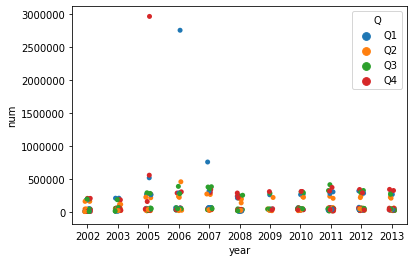

In [25]:
q_bplot = sns.stripplot(x='year', y='num', hue='Q', data=fin, jitter= True)
q_bplot

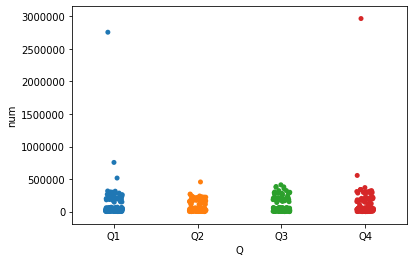

In [26]:
qup_bplot = sns.stripplot(x='Q', y='num', data=actl)
qup_bplot

b) In relation to purposes

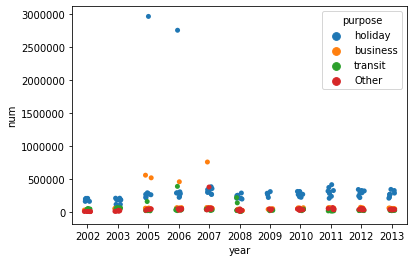

In [27]:
purpose_bplot = sns.stripplot(x='year', y='num', hue='purpose', data=fin)
purpose_bplot


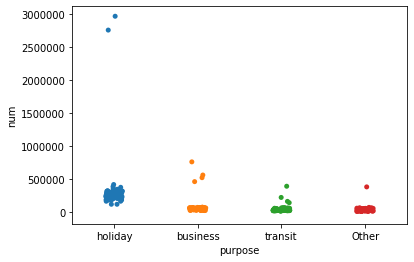

In [28]:
pup_bplot = sns.stripplot(x='purpose', y='num', data=fin)
pup_bplot

# ANALYSIS:

# a) Univariate analysis:

Analysis of the num variable, which is the number of visitors:

In [29]:
descr = fin['num'].describe()
descr

count    3.360000e+02
mean     1.156432e+05
std      2.422412e+05
min      3.800000e+03
25%      2.695000e+04
50%      4.485000e+04
75%      1.809000e+05
max      2.966000e+06
Name: num, dtype: float64

In [31]:
fin['num'].var()

58680810938.07749

In [15]:
fin['num'].std()

167237.0652836366

In [16]:
fin['num'].skew()

11.414670075091141

In [17]:
fin['num'].kurt()

183.64413696629836

# b) Bivariate analysis:

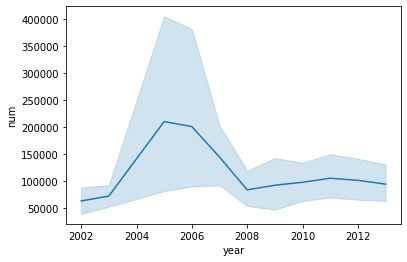

In [33]:
sns.lineplot(x='year', y='num', data=fin)

In [32]:
yearly = fin['num'].groupby(fin['year']).sum().sort_values(ascending = False)
yearly

year
2005    6714300
2006    6417200
2007    4607400
2011    3351100
2012    3226900
2010    3111400
2013    3001600
2008    2662700
2003    2292400
2002    2002800
2009    1468300
Name: num, dtype: int64

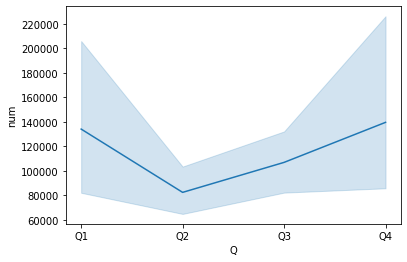

In [34]:
sns.lineplot(x='Q', y='num', data=fin)


In [35]:
quat = fin['num'].groupby(fin['Q']).sum().sort_values(ascending = False)
quat

Q
Q4    11716000
Q1    11254300
Q3     8971100
Q2     6914700
Name: num, dtype: int64

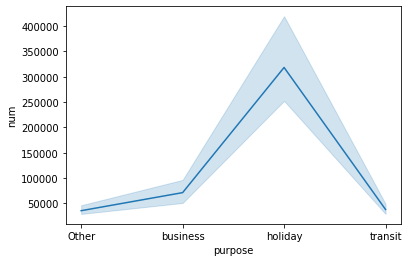

In [36]:
sns.lineplot(x='purpose', y='num', data=fin)


In [37]:
pup = fin['num'].groupby(fin['purpose']).sum().sort_values(ascending = False)
pup

purpose
holiday     26734400
business     5970300
transit      3176500
Other        2974900
Name: num, dtype: int64

# c) Multivariate analysis:

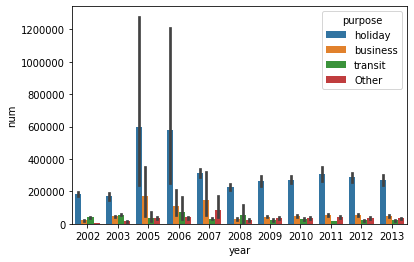

In [39]:
sns.barplot(x='year', y='num',hue='purpose', data=fin)


In [40]:
yr_pup = fin['num'].groupby([fin['year'], fin['purpose']]).sum()
yr_pup

year  purpose 
2002  Other         37800
      business     173200
      holiday     1465200
      transit      326600
2003  Other        122000
      business     364200
      holiday     1368000
      transit      438200
2005  Other        290600
      business    1372100
      holiday     4759700
      transit      291900
2006  Other        313900
      business     856200
      holiday     4645600
      transit      601500
2007  Other        686700
      business    1154700
      holiday     2510500
      transit      255500
2008  Other        173100
      business     218100
      holiday     1827700
      transit      443800
2009  Other        136600
      business     169300
      holiday     1064900
      transit       97500
2010  Other        281800
      business     402000
      holiday     2185800
      transit      241800
2011  Other        346900
      business     430300
      holiday     2439400
      transit      134500
2012  Other        308400
      business     4377

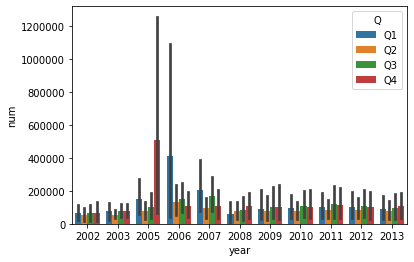

In [42]:
sns.barplot(x='year', y='num', hue='Q', data=fin)

In [43]:
yr_quat = fin['num'].groupby([fin['year'], fin['Q']]).sum()
yr_quat

year  Q 
2002  Q1     509800
      Q2     444200
      Q3     512600
      Q4     536200
2003  Q1     602000
      Q2     448600
      Q3     622000
      Q4     619800
2005  Q1    1208600
      Q2     619200
      Q3     807700
      Q4    4078800
2006  Q1    3320000
      Q2    1057500
      Q3    1189300
      Q4     850400
2007  Q1    1628800
      Q2     756500
      Q3    1347000
      Q4     875100
2008  Q1     485700
      Q2     629400
      Q3     658200
      Q4     889400
2009  Q1     359000
      Q2     302400
      Q3     398200
      Q4     408700
2010  Q1     762000
      Q2     643000
      Q3     866800
      Q4     839600
2011  Q1     818600
      Q2     683700
      Q3     940700
      Q4     908100
2012  Q1     832400
      Q2     691600
      Q3     875600
      Q4     827300
2013  Q1     727400
      Q2     638600
      Q3     753000
      Q4     882600
Name: num, dtype: int64

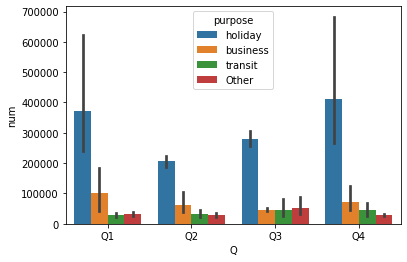

In [44]:
sns.barplot(x='Q', y='num', hue='purpose', data=fin)


In [46]:
q_pup = fin['num'].groupby([fin['Q'], fin['purpose']]).sum()
q_pup

Q   purpose 
Q1  Other        655600
    business    2145900
    holiday     7840700
    transit      612100
Q2  Other        596100
    business    1315800
    holiday     4353300
    transit      649500
Q3  Other       1112200
    business     980900
    holiday     5897100
    transit      980900
Q4  Other        611000
    business    1527700
    holiday     8643300
    transit      934000
Name: num, dtype: int64